<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">ML Capstone Project</font></h1>

Let's use our shared data for Seattle city as an example of how to deal with the accidents data.
The same can be applied to any data set that you might use for this capstone.  To choose the right data set for this capstone project,
please go through the following reading section called guidance in finding a data set.
Let's open the CSV file and check what type of data we have.
The first column colored in yellow is the labeled data.
The remaining columns have different types of attributes.
Some or all can be used to train the model.
You can also find that most of the observations are good to train and test the machine learning model.
The label for the data set is severity, which describes the fatality of an accident.
You will notice that the shared data has unbalanced labels.
You should balance the data, otherwise, you will create a biased ML model.
The following is a list of attributes or features that you can use.
For good description of each attribute, you can refer to the web link on the CSV file.
You might need to do some feature engineering to improve the predictability of your model.
You can get the data set from any open source, such as Open Government Data portal,
or any research groups that allow you to use their data.
Here are some good resources that can help you find your data set and start building your machine learning model.
I recommend you go through them carefully.


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [ ]:
print ('Hello Capstone Project Course!')

In [ ]:
#How to Plan a Data Mining Project
# Display the associated webpage in a new window
import IPython
url = 'https://www.coursera.org/learn/applied-data-science-capstone/discussionPrompt/CsXGk/how-to-plan'
iframe = '<iframe src=' + url + ' width=700 height=350></iframe>'
IPython.display.HTML(iframe)

# Using the CRISP-DM Method to Plan this Machine Learning Capstone Project

## Business Understanding or the Problem on the 'Ground'
As a Driver of a car in the Seattle Wash Area,
I want to be able to be warned of the probability of both getting into a car accident and its severity given the weather and road conditions 
so that I would drive more carefully or even change my travel plans if I am able.

## Data Understanding
Analyzing the impact of environmental stimuli (e.g., road-network properties, weather, and traffic) 
on traffic accident occurrence patterns [10, 15, 30], predicting frequency of
accidents within a geographical region [3, 6, 23, 29, 36], and predicting
risk of accidents  (predicts future accidents at the fine-grained time interval of 15 minutes)
[8, 18, 35, 37] are the major related research categories.
While predicting the risk of accidents is the target or label of the data set and thus,
the primary goal of this project, the attributes or features used to predict risk
will be, at a high level: road-network properties, weather, and traffic.  At a lower-level,
each column in the dataset will be analyzed for its trend, pattern, skewed information
and correlations to other columns to determine which features to include in the model.
In other words, traffic events (e.g., congestion, construction, and road hazards), 

###  Road-Network Properties

 - Points of Interest 
    - Amenity: Refers to particular places such as restaurant,library, college, bar, etc.
    - Bump: Refers to speed bump or hump to reduce the speed.
    - Crossing: Refers to any crossing across roads for pedestrians, cyclists, etc.
    - Give-way:  A sign on road which shows priority of passing.
    - Junction: Refers to any highway ramp, exit, or entrance.
    - No-exit: Indicates there is no possibility to travel further by any transport mode along a formal path or route.
    - Railway: Indicates the presence of railways.
    - Roundabout: Refers to a circular road junction.
    - Station: Refers to public transportation station (bus, metro, etc.).
    - Stop: Refers to stop sign.
    - Traffic Calming: Refers to any means for slowing down traffic speed.
    - Traffic Signal: Refers to traffic signal on intersections.
    - Turning Loop: Indicates a widened area of a highway with a non-traversable island for turning around.




### Weather 

 - temperature, humidity, windspeed,pressure, precipitation (in millimeters), condition (clear, snow, rain, fog, hail, and thunderstorm)
   (e.g., temperature, visibility, and wind speed),
 - points-of-interest (e.g., traffic signal, stop sign, and junction), and
 - time (e.g., day of week, hour of day, and period of day) can be used as features.
 
### Traffic
 
  - congestion, 
  - construction, and 
  - road hazards
 

### About dataset

Attribute 	Data Type, Length 	Description
- OBJECTID 	ObjectID 	ESRI unique identifier
- SHAPE 	Geometry 	ESRI geometry field
- INCKEY 	Long 	A unique key for the incident
- COLDETKEY 	Long 	Secondary key for the incident
- ADDRTYPE 	Text, 12 	Collision address type: Alley, Block, Intersection
- INTKEY 	Double 	Key that corresponds to the intersection associated with a collision
- LOCATION 	Text, 255 	Description of the general location of the collision
- EXCEPTRSNCODE 	Text, 10 	Not specified
- EXCEPTRSNDESC 	Text, 300 	Not specified
- SEVERITYCODE 	Text, 100 	A code that corresponds to the severity of the collision: 3—fatality, 2b—serious injury, 2—injury, 1—prop damage, 0—unknown
- SEVERITYDESC 	Text 	A detailed description of the severity of the collision
- COLLISIONTYPE 	Text, 300 	Collision type
- PERSONCOUNT 	Double 	The total number of people involved in the collision
- PEDCOUNT 	Double 	The number of pedestrians involved in the collision. This is entered by the state.
- PEDCYLCOUNT 	Double 	The number of bicycles involved in the collision. This is entered by the state.
- VEHCOUNT 	Double 	The number of vehicles involved in the collision. This is entered by the state.
- INJURIES 	Double 	The number of total injuries in the collision. This is entered by the state.
- SERIOUSINJURIES 	Double 	The number of serious injuries in the collision. This is entered by the state.
- FATALITIES 	Double 	The number of fatalities in the collision. This is entered by the state.
- INCDATE 	Date 	The date of the incident.
- INCDTTM 	Text, 30 	The date and time of the incident.
- JUNCTIONTYPE 	Text, 300 	Category of junction at which collision took place
- SDOT_COLCODE 	Text, 10 	A code given to the collision by SDOT.
- SDOT_COLDESC 	Text, 300 	A description of the collision corresponding to the collision code.
- INATTENTIONIND 	Text, 1 	Whether or not collision was due to inattention. (Y/N)
- UNDERINFL 	Text, 10 	Whether or not a driver involved was under the influence of drugs or alcohol.
- WEATHER 	Text, 300 	A description of the weather conditions during the time of the collision.
- ROADCOND 	Text, 300 	The condition of the road during the collision.
- LIGHTCOND 	Text, 300 	The light conditions during the collision.
- PEDROWNOTGRNT 	Text, 1 	Whether or not the pedestrian right of way was not granted. (Y/N)
- SDOTCOLNUM 	Text, 10 	A number given to the collision by SDOT.
- SPEEDING 	Text, 1 	Whether or not speeding was a factor in the collision. (Y/N)
- ST_COLCODE 	Text, 10 	A code provided by the state that describes the collision. For more information about these codes, please see the State Collision Code Dictionary.
- ST_COLDESC 	Text, 300 	A description that corresponds to the state’s coding designation.
- SEGLANEKEY 	Long 	A key for the lane segment in which the collision occurred.
- CROSSWALKKEY 	Long 	A key for the crosswalk at which the collision occurred.
- HITPARKEDCAR 	Text, 1 	Whether or not the collision involved hitting a parked car. (Y/N)                                 |

Lets download the dataset

In [ ]:
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

### Load Data From CSV File  

In [2]:
df = pd.read_csv("C:\\Users\\StephenVoorhees\\Documents\\_Training\\Python\\Capstone\\Data-Collisions.csv")
df.head()

C:\Users\StephenVoorhees\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [ ]:
df.shape

In [3]:
# Convert INCDTTM to date type as it is currently a string (object)
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'], errors='coerce')

# Extract month, weekday, hour.  While this is a transformation, it is necessary to use this in Exploratory Data Analysis i.e. Data Understanding.
df['Month']=df['INCDTTM'].dt.month
df['Weekday']=df['INCDTTM'].dt.weekday
df['Hour']=df['INCDTTM'].dt.hour

# Drop Columns that are not predictors
df.drop(['SEVERITYCODE.1','OBJECTID', 'INCKEY', 'COLDETKEY', 'INTKEY', 'SEGLANEKEY', 'CROSSWALKKEY', 'EXCEPTRSNCODE', 'REPORTNO', 
         'SDOT_COLCODE','STATUS', 'SDOTCOLNUM','EXCEPTRSNDESC', 'SEVERITYDESC', 'SDOT_COLDESC', 'ST_COLDESC', 'LOCATION'], axis=1, inplace=True)

In [4]:
df.head()

,SEVERITYCODE,X,Y,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,...,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR,Month,Weekday,Hour
0,2,-122.323148,47.703140,Intersection,Angles,2,0,0,2,2013/03/27 00:00:00+00,...,Overcast,Wet,Daylight,NaN,NaN,10,N,3,2,14
1,1,-122.347294,47.647172,Block,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,...,Raining,Wet,Dark - Street Lights On,NaN,NaN,11,N,12,2,18
2,1,-122.334540,47.607871,Block,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,...,Overcast,Dry,Daylight,NaN,NaN,32,N,11,3,10
3,1,-122.334803,47.604803,Block,Other,3,0,0,3,2013/03/29 00:00:00+00,...,Clear,Dry,Daylight,NaN,NaN,23,N,3,4,9
4,2,-122.306426,47.545739,Intersection,Angles,2,0,0,2,2004/01/28 00:00:00+00,...,Raining,Wet,Daylight,NaN,NaN,10,N,1,2,8


In [8]:
df.dtypes

SEVERITYCODE               int64
X                        float64
Y                        float64
ADDRTYPE                  object
COLLISIONTYPE             object
PERSONCOUNT                int64
PEDCOUNT                   int64
PEDCYLCOUNT                int64
VEHCOUNT                   int64
INCDATE                   object
INCDTTM           datetime64[ns]
JUNCTIONTYPE              object
INATTENTIONIND            object
UNDERINFL                 object
WEATHER                   object
ROADCOND                  object
LIGHTCOND                 object
PEDROWNOTGRNT             object
SPEEDING                  object
ST_COLCODE                object
HITPARKEDCAR              object
Month                      int64
Weekday                    int64
Hour                       int64
dtype: object

## Data Understanding - Continued aka Data visualization and pre-processing
- assess the condition of chosen attributes by 
    - looking for trends, 
    - certain patterns, 
    - skewed information, 
    - correlations, 
    - and so on. 

In [5]:
#dropna=False means that we want to know if there are any missing values for the target 
#so that we can know to drop them or not.  If normalize=True, then we get the proportions instead of counts.
df['SEVERITYCODE'].value_counts(normalize=False, dropna=False)

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [5]:
import seaborn as sns

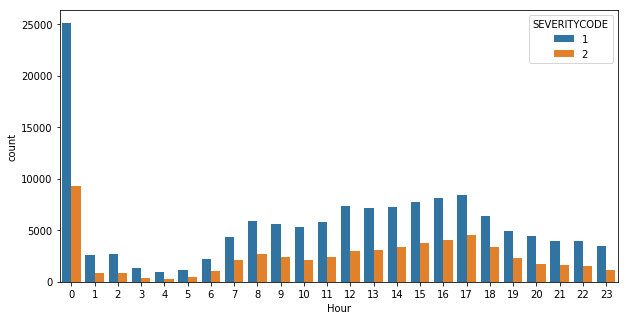

In [6]:
#Figure Size
plt.figure(figsize=(10,5))
# count plot on two categorical variable 
sns.countplot(x ='Hour', hue = "SEVERITYCODE", data = df) 
  
# Show the plot 
plt.show() 

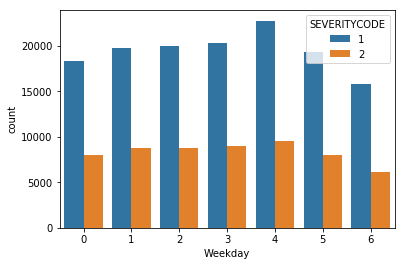

In [7]:
# count plot on two categorical variable 
sns.countplot(x ='Weekday', hue = "SEVERITYCODE", data = df) 
  
# Show the plot 
plt.show() 

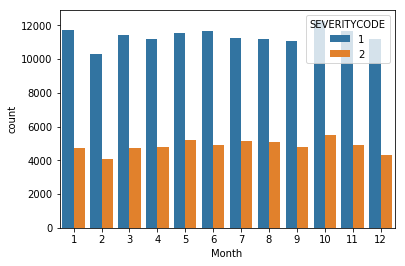

In [8]:
# count plot on two categorical variable 
sns.countplot(x ='Month', hue = "SEVERITYCODE", data = df) 
  
# Show the plot 
plt.show() 

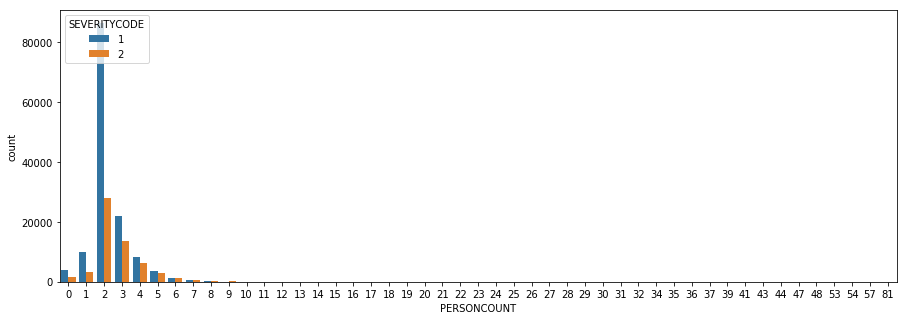

In [10]:
#Figure Size
plt.figure(figsize=(15,5))
# count plot on two categorical variable 
sns.countplot(x ='PERSONCOUNT', hue = "SEVERITYCODE", data = df) 
  
# Show the plot 
plt.show()

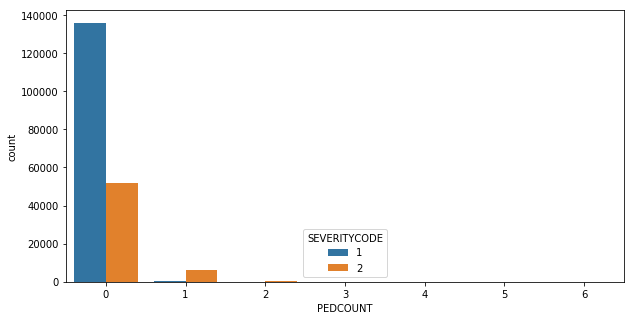

In [11]:
#Figure Size
plt.figure(figsize=(10,5))
# count plot on two categorical variable 
sns.countplot(x ='PEDCOUNT', hue = "SEVERITYCODE", data = df) 
  
# Show the plot 
plt.show()

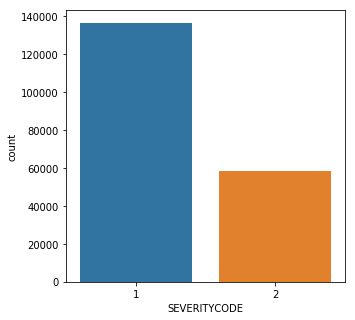

In [13]:
#Figure Size
plt.figure(figsize=(5,5))
# count plot on two categorical variable 
sns.countplot(x ='SEVERITYCODE', data = df) 
  
# Show the plot 
plt.show()

In [14]:
'''
countseverity = df.SEVERITYCODE.unique()
count_by_severity=[]
for i in df.SEVERITYCODE.unique():
    count_by_severity.append(df.loc[df.SEVERITYCODE == i, 'SEVERITYCODE'].count())
    print(i)
print(count_by_severity)
print(countseverity)

fig, ax = plt.subplots(figsize=(5,5))
plt.title('Count of Accidents by Severity', y=1.05)
ax.set(xlabel='Severity Code 1=Property Damage Only, 2=Injury Collision', ylabel='Count')
sns.barplot(countseverity, count_by_severity)
'''

"\ncountseverity = df.SEVERITYCODE.unique()\ncount_by_severity=[]\nfor i in df.SEVERITYCODE.unique():\n    count_by_severity.append(df.loc[df.SEVERITYCODE == i, 'SEVERITYCODE'].count())\n    print(i)\nprint(count_by_severity)\nprint(countseverity)\n\nfig, ax = plt.subplots(figsize=(5,5))\nplt.title('Count of Accidents by Severity', y=1.05)\nax.set(xlabel='Severity Code 1=Property Damage Only, 2=Injury Collision', ylabel='Count')\nsns.barplot(countseverity, count_by_severity)\n"

The above chart shows that Severity Code = 1 overwhelms Severity Code = 2 so that balancing is needed.

### Data Preparation
Data preparation includes balancing the labeled data, transformation, filling missing data, and cleaning the dataset. 

### Data preparation includes 
- balancing the labeled data, 
- transformation, 
- filling missing data, and 
- cleaning the dataset. 

In [ ]:
import seaborn as sns

### Balance the Label Data

In [ ]:
df['SEVERITYCODE'].value_counts()

In [ ]:
g = df.groupby('SEVERITYCODE')
g = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))

In [ ]:
g.value_counts()

The above statement has balanced the data set such that there are 58157 Records that have a collision without a serious injury and 58219 Records of collisions with a serious injury.  This data is 

In [ ]:
g.head()

Ignore the following....

### Convert to date time object 

In [ ]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [ ]:
#df['loan_status'].value_counts()

In [ ]:
df['loan_status'].dtypes

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [ ]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

In [ ]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [ ]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

In [ ]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [ ]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

## Convert Categorical features to numerical values

Lets look at gender:

In [ ]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

86 % of female pay their loans while only 73 % of males pay their loan


Lets convert male to 0 and female to 1:


In [ ]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df['Gender'].astype(int)
df.head()

In [ ]:
df['Gender'].dtypes

## One Hot Encoding  
#### How about education?

In [ ]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

#### Feature before One Hot Encoding

In [ ]:
df[['Principal','terms','age','Gender','education']].head()

#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [ ]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()
Feature.dtypes


### Feature selection

Lets define feature sets, X:

In [ ]:
X = Feature
X[0:5]

What are our labels?

In [ ]:
y = df['loan_status'].values
y[0:5]

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [ ]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

In [ ]:
yhat = neigh.predict(X_test)
from sklearn import metrics

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
# accuracy_score = Jaccard index score



In [ ]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat))

# Decision Tree

In [ ]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [ ]:
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
loanTree # it shows the default parameters

In [ ]:
loanTree.fit(X_train,y_train)

In [ ]:
predTree = loanTree.predict(X_test)
print (predTree [0:5])
print (y_test [0:5])

In [ ]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

In [ ]:
print(classification_report(y_test, predTree))

In [ ]:
!conda install -c conda-forge pydotplus -y

In [ ]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [ ]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = df.columns[0:8]
targetNames = df["loan_status"].unique().tolist()
out=tree.export_graphviz(loanTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

# Support Vector Machine

In [ ]:
import pylab as pl
import numpy as np
import scipy.optimize as opt

In [ ]:
df['loan_status'].replace(to_replace=['COLLECTION','PAIDOFF'], value=[0,1],inplace=True)
df['loan_status'].astype('int')
df.head()

In [ ]:
df.dtypes
df = df[pd.to_numeric(df['education'], errors='coerce').notnull()]
df['education'] = df['education'].astype('int')
df = df[pd.to_numeric(df['Gender'], errors='coerce').notnull()]
df['Gender'] = df['Gender'].astype('int')
df = df[pd.to_numeric(df['dayofweek'], errors='coerce').notnull()]
df['dayofweek'] = df['dayofweek'].astype('int')
df = df[pd.to_numeric(df['weekend'], errors='coerce').notnull()]
df['weekend'] = df['weekend'].astype('int')
df.dtypes


In [ ]:
y = df['loan_status'].values
y[0:5]


In [ ]:
df.dtypes

In [ ]:
#ax = df[df['loan_status'] == 0][0:50].plot(kind='scatter', x='weekend', y='Gender', color='DarkBlue', label='COLLECTION');
#df[df['loan_status'] == 1][0:50].plot(kind='scatter', x='weekend', y='Gender', color='Yellow', label='PAIDOFF', ax=ax);
#plt.show()

In [ ]:
from sklearn import svm

In [ ]:
#SVM Classifier with a Radial Base Function Kernel
loansvm1 = svm.SVC(kernel='rbf').fit(X_train, y_train)
yhat1 = loansvm1.predict(X_test)
svm_rbf = metrics.accuracy_score(y_test, yhat1)

#SVM Classifier with a Linear Kernel
loansvm2 = svm.SVC(kernel='linear').fit(X_train, y_train)
yhat2 = loansvm2.predict(X_test)
svm_linear = metrics.accuracy_score(y_test, yhat2)
    
#SVM Classifier with a Polynomial Kernel
loansvm3 = svm.SVC(kernel='poly').fit(X_train, y_train)
yhat3 = loansvm3.predict(X_test)
svm_poly = metrics.accuracy_score(y_test, yhat3)

#SVM Classifier with a Sigmoid Kernel
loansvm4 = svm.SVC(kernel='sigmoid').fit(X_train, y_train)
yhat4 = loansvm4.predict(X_test)
svm_sigmoid = metrics.accuracy_score(y_test, yhat4)
    
print(svm_rbf,svm_linear,svm_poly,svm_sigmoid)

In [ ]:
print(classification_report(y_test, yhat1))

In [ ]:
print(classification_report(y_test, yhat2))

In [ ]:
print(classification_report(y_test, yhat3))

In [ ]:
print(classification_report(y_test, yhat4))

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

In [ ]:
yhat = LR.predict(X_test)
yhat

In [ ]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

In [ ]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

In [ ]:
print (classification_report(y_test, yhat))

In [ ]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

# Model Evaluation using Test set

In [ ]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [ ]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

### Load Test set for evaluation 

In [ ]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

In [ ]:
#Shape of loan_test.csv
test_df.shape

In [ ]:
# Count of loan_test.csv
test_df['loan_status'].value_counts()

In [ ]:
df = test_df

df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df['dayofweek'] = df['effective_date'].dt.dayofweek
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

df.groupby(['education'])['loan_status'].value_counts(normalize=True)

In [ ]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)

X_test = Feature


In [ ]:
y_test = df['loan_status'].values

In [ ]:
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)

### KNN model testing

In [ ]:
#neigh = KNeighborsClassifier(n_neighbors = 7).fit(X_test,y_test)
yhat_knn = neigh.predict(X_test)

In [ ]:
#Calculate the Jaccard index# Predict using the model
jac_knn = jaccard_similarity_score(y_test, yhat_knn)

In [ ]:
# Calculate the f1 score
f1_knn = f1_score(y_test, yhat_knn, average='weighted') 

In [ ]:
print('Jaccard index: ',jac_knn)
print('f1 score: ',f1_knn)

### Decision Tree model testing

In [ ]:
yhat_dt = loanTree.predict(X_test)

In [ ]:
#Calculate the Jaccard index# Predict using the model
jac_dt = jaccard_similarity_score(y_test, yhat_dt)

In [ ]:
# Calculate the f1 score
f1_dt = f1_score(y_test, yhat_dt, average='weighted') 

In [ ]:
print('Jaccard index: ',jac_dt)
print('f1 score: ',f1_dt)

### Support Vector Machine model testing

In [ ]:
yhat2_svm = loansvm2.predict(X_test)

In [ ]:
#Calculate the Jaccard index# Predict using the model
jac_svm = jaccard_similarity_score(y_test, yhat2_svm)

In [ ]:
# Calculate the f1 score
f1_svm = f1_score(y_test, yhat2_svm, average='weighted') 

In [ ]:
print('Jaccard index: ',jac_svm)
print('f1 score: ',f1_svm)

### Logistic Regression model testing

In [ ]:
yhat_LR = LR.predict(X_test)

In [ ]:
yhat_prob_LR = LR.predict_proba(X_test)

In [ ]:
#Calculate the Jaccard index# Predict using the model
jac_LR = jaccard_similarity_score(y_test, yhat_LR)

In [ ]:
# Calculate the f1 score
f1_LR = f1_score(y_test, yhat_LR, average='weighted') 

In [ ]:
ll_LR = log_loss(y_test, yhat_prob_LR)

In [ ]:
print('Jaccard index: ',jac_LR)
print('f1 score: ',f1_LR)
print('LogLoss: ',ll_LR)

# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

In [ ]:
Jaccard = [jac_knn, jac_dt,jac_svm,jac_LR]
F1_score = [f1_knn, f1_dt, f1_svm, f1_LR]
LogLoss = ['NA', 'NA', 'NA', ll_LR]

In [ ]:
df = {'Algorithm': ['KNN', 'Decision Tree', 'SVM', 'LogisticRegression'], \
     'Jaccard': Jaccard, 'F1-score': F1_score, 'LogLoss': LogLoss}
Report = pd.DataFrame(data=df, columns=['Algorithm', 'Jaccard', 'F1-score', 'LogLoss'])
Report

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      
| SVM                | ?       | ?        | NA      
| LogisticRegression | ?       | ?        | ?       |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>